<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Nearest neighbor methods </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 26, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. What is a nearest neighbor method?
<hr style="height:1px;border:none" />

## I want to fit in like everybody else

Say, there are two classes of data points. And you have a new observation to be classified into one of the two classes. 

`<kNN_2Clusters.py>`

In [1]:
%matplotlib inline

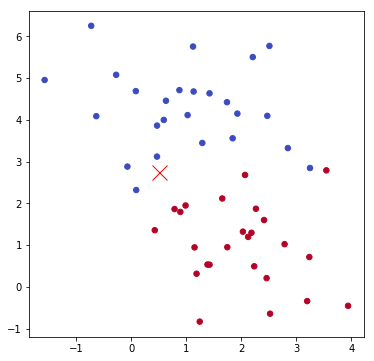

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, x, y, h=.02, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    params: dictionary of params to pass to contourf, optional
    """
    xx, yy = make_meshgrid(x, y, h)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.0)


# plotting the toy data plus a new observation
x_new = 0.5
y_new = 2.75
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.plot(x_new, y_new, marker='x', c='r', ms=15)
plt.show()

See the new observation (red X). Should this be classified as blue or red? We can classify based on the observations around it.

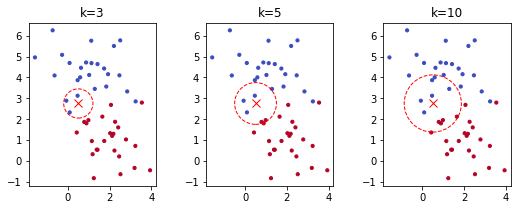

In [3]:
# k nearest neighbors
plt.figure(figsize=[9,3])
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=0.7, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=3')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.0, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=5')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.37, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=10')

plt.show()

These plots show circles encompassing $k$ ($k=3$, $5$, and $10$) nearest neighbors of the new observation. We can classify the new observation as the most abundant class in each of the circles. In this case,
  * $k=3$: Blue=3 $\rightarrow$ Classified as Blue
  * $k=5$: Blue=3, Red=2 $\rightarrow$ Classified as Blue
  * $k=10$: Blue=6, Red=4 $\rightarrow$ Classified as Blue

As you can see, voting among $k$ nearest neighbors enables classification of a new observation without an explicit model. This classification method is known as the **k nearest neighbor** **(kNN** or **KNN)** method. 

The k nearest neighbor method is implemented as the **`KNeighborsClassifier`** transformation object in **`sklearn.neighbors`**. Here is an example.

In [4]:
# k nearest neighbor classifier object
kNN5 = KNeighborsClassifier(5, weights='uniform')
kNN5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

The first parameter of `KNeighborsClassifier` is k, the number of nearest neighbors to be considered. The parameter **`weights='uniform`** indicates that all k neighbors count equally in the voting process for classification. As in other transformation objects we have seen before, the **`.fit`** method with the feature data as well as the target information implements the actual learning process from the data to generate a classifier. Here is the resulting decision boundary.

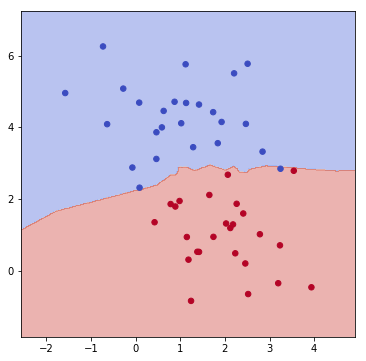

In [5]:
# decision boundary
plt.figure(figsize=[6,6])
ax = plt.subplot(111)
plot_contours(ax, kNN5, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.show()

The choice of k influences the decision boundary. Here are examples with different values of k.

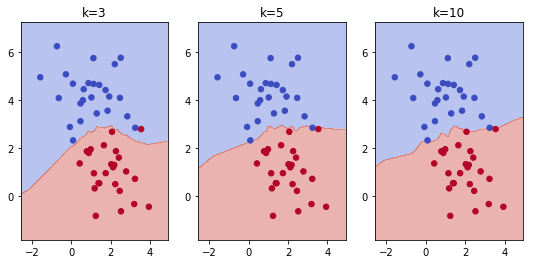

In [6]:
# k nearest neighbor classifier object with different k
kNN3 = KNeighborsClassifier(3, weights='uniform')
kNN3.fit(X,y)

kNN10 = KNeighborsClassifier(10, weights='uniform')
kNN10.fit(X,y)


# decision boundary
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, kNN3, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=3')

ax = plt.subplot(132)
plot_contours(ax, kNN5, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=5')

ax = plt.subplot(133)
plot_contours(ax, kNN10, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=10')

plt.show()

The larger the parameter k is, the smoother the decision boundary becomes. A small k may lead to a problem known as **over-fitting**, where the classifier works very well only for the given training data, and may not be generalized to other data. 

## Ties

Depending on the number of classes, the choice of certain values of k may lead to ties, or the number of equal votes in more than one class in a neighborhood. For example, in a 2-class classification problem, if k is an even number, then the number of votes for each class may be k/2 and cannot conclude which class is more appropriate. If such ties happen, then there is no definitive answer as to how the predicted class is chosen.  Here is the warning from the `sklearn` documentation:

>**Warning** Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data. 

So a choice of k with potential ties should be avoided.
  * For a 2-class classification, k should not be an even number
  * For a classification into p classes, k should not be a multiple of p.
     * **e.g.**, 3-class classification, then k shouldn't be 3, 6, 9 , 12, ..


## Weighted by the distance

One way to avoid the problem with ties is to give more weights to votes that are closer to the new observation. In other words, k votes are no longer counted as equals, but those closer to the new observation should account more, and vice versa. This can be implemented by setting the parameter **`weights='distance'`** in `KNeighborsClassifier`. However, the use of the distance information may lead to over-fitting. Here are examples of k neighbor classifiers on the same data, but this time with `weights='distance'` in stead of `uniform`.

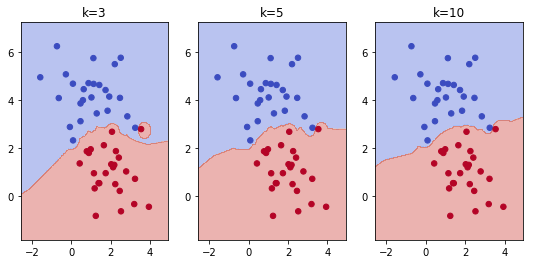

In [7]:
# k nearest neighbor classifier object with different k
# now weighted by the distance
kNN3dist = KNeighborsClassifier(3, weights='distance')
kNN3dist.fit(X,y)

kNN5dist = KNeighborsClassifier(5, weights='distance')
kNN5dist.fit(X,y)

kNN10dist = KNeighborsClassifier(10, weights='distance')
kNN10dist.fit(X,y)


# decision boundary
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, kNN3dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=3')

ax = plt.subplot(132)
plot_contours(ax, kNN5dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=5')

ax = plt.subplot(133)
plot_contours(ax, kNN10dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=10')

plt.show()

You can see that the boundary curves around a few observations near the boundary.

# 2. Example: iris data
<hr style="height:1px;border:none" />

Here, we apply the kNN method to the iris data. We will focus on ***two features (sepal length and petal width)***. We will use 90 observations as the training data set, and the remaining 60 observations as the testing data set.

`<IrisKNN.py>`

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# Loading the iris data
iris = datasets.load_iris()
X = iris.data[:,[0,3]]  # sepal length and petal width only
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)

Here, we use `k=5` and `k=20`, as well as `weights='uniform'` and `weights='distance'` in our kNN classifiers.

In [10]:
# k nearest neighbor classifier objects
kNN5uni = KNeighborsClassifier(5, weights='uniform')
kNN5uni.fit(X_train,y_train)

kNN5dist = KNeighborsClassifier(5, weights='distance')
kNN5dist.fit(X_train,y_train)

kNN20uni = KNeighborsClassifier(20, weights='uniform')
kNN20uni.fit(X_train,y_train)

kNN20dist = KNeighborsClassifier(20, weights='distance')
kNN20dist.fit(X_train,y_train)



# Predicted classes
y_pred_5uni = kNN5uni.predict(X_test)
y_pred_5dist = kNN5dist.predict(X_test)
y_pred_20uni = kNN20uni.predict(X_test)
y_pred_20dist = kNN20dist.predict(X_test)

We can see the resulting decision boundaries.

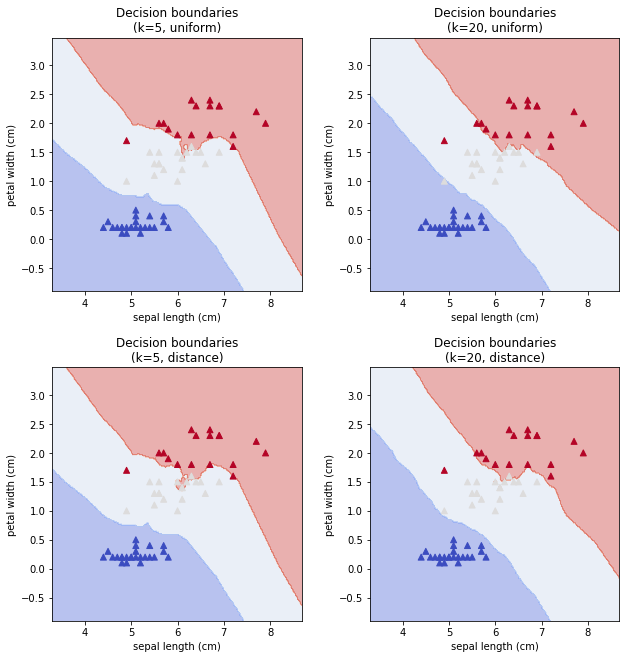

In [11]:
# plotting the boundaries and the testing data
plt.figure(figsize=[9,9])
ax = plt.subplot(221)
plot_contours(ax, kNN5uni, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=5, uniform)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(222)
plot_contours(ax, kNN20uni, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=20, uniform)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(223)
plot_contours(ax, kNN5dist, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=5, distance)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(224)
plot_contours(ax, kNN20dist, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=20, distance)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

plt.subplots_adjust(hspace=0.3, wspace=0.275, 
                    bottom=0.05, top=0.95, left=0.10, right=0.975)
plt.show()

Let's examine the confusion matrices.

In [12]:
# classifier performance
print('K=5, uniform\n', confusion_matrix(y_test,y_pred_5uni))
print('\nK=5, distance\n', confusion_matrix(y_test,y_pred_5dist))
print('\nK=20, uniform\n', confusion_matrix(y_test,y_pred_20uni))
print('\nK=20, distance\n', confusion_matrix(y_test,y_pred_20dist))

K=5, uniform
 [[24  0  0]
 [ 0 17  2]
 [ 0  3 14]]

K=5, distance
 [[24  0  0]
 [ 0 14  5]
 [ 0  2 15]]

K=20, uniform
 [[24  0  0]
 [ 1 17  1]
 [ 0  2 15]]

K=20, distance
 [[24  0  0]
 [ 0 15  4]
 [ 0  1 16]]


**`k=20, uniform`** seems to perform well in this scenario. Here is its classification report.

In [13]:
print(classification_report(y_test, y_pred_20uni,
                            target_names=target_names))

              precision    recall  f1-score   support

      setosa       0.96      1.00      0.98        24
  versicolor       0.89      0.89      0.89        19
   virginica       0.94      0.88      0.91        17

   micro avg       0.93      0.93      0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



# 3. Example: Cryotherapy data
<hr style="height:1px;border:none" />

Recall the cryotherapy data from the [logistic regression](https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/Logistic.ipynb) lecture. This data set contains the outcome of a cryotherapy (1=success) of 90 patients, as well as a number of features. In this example, *we will focus on features* **`Age`** (age) and **`Time`** (time elapsed before the treatment). First, we load the data set and standardize the features.

`<CryoKNN.py>`

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# loading the data
CryoData = pd.read_csv('Cryotherapy.csv')

# Creating the data set
X = np.array(CryoData.loc[:,['Age','Time']])
y = np.array(CryoData.Success)
targetNames = ['Failure', 'Success']

# Standardizing the data
stdData = StandardScaler().fit(X)  # standardization object
X_norm = stdData.transform(X)  # the actual transformation

Here is a scatter plot of the data. Younger patients and/or shorter elapsed times tend to result in a success (red). 

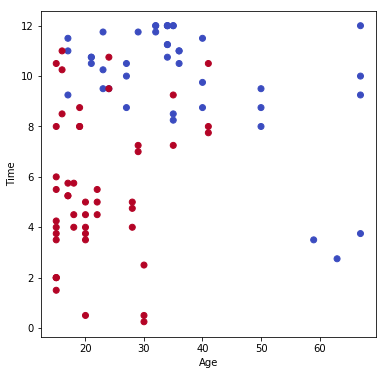

In [15]:
# plotting the data
plt.figure(figsize=[6,6])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('Time')
plt.show()

### Exercise
1. **Cryotherapy, kNN classifier**. Using all available observations, generate a classifier with `k=15` and `uniform` weights.
2. **Success according to age**. Say, your friend is a dermatologist and she wants to know whether a new patient (with 6 months of elapsed time) should undergo a cryotherapy. She is aware that younger patients have a better chance of success. So she asked you to create a predictive model according to a patient's age. Using the kNN classifier you created earlier, generate a plot of predicted outcome (1 or 0) plotted against a range of age (15-65 years old, with 5-year increment) of a potential candidate for the treatment (with 6 mo of relapsed time).
3. **Success according to elapsed time**. Say, your dermatologist friend also asked you to create a predictive model for a 30 year old patient.  Using the kNN classifier you created earlier, generate a plot of predicted outcome (1 or 0) plotted against a range of elapsed time (1-12 months, with 1 month increment) of a 30-year old potential candidate for the treatment.

In [16]:
# k nearest neighbor classifier object
kNN5 = KNeighborsClassifier(15, weights='uniform')
kNN5.fit(X_norm,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


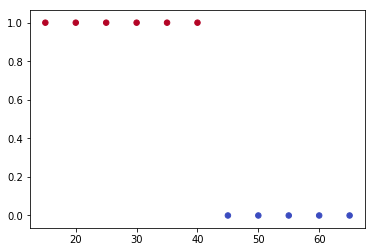

In [17]:
#predict
x_pred = np.array([[15,6],[20,6],[25,6],[30,6],[35,6],[40,6],[45,6],[50,6],[55,6],[60,6],[65,6]])
X_norm = stdData.transform(x_pred)  # the actual transformation
y_pred = kNN5.predict(X_norm)
# plot
plt.scatter(x_pred[:,0], y_pred, c=y_pred, cmap=plt.cm.coolwarm, s=30)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


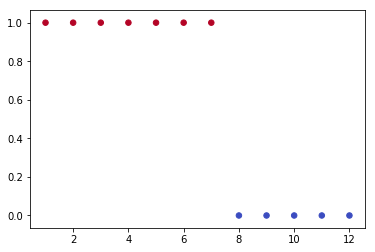

In [18]:
#predict
x_pred = np.array([[30,1],[30,2],[30,3],[30,4],[30,5],[30,6],[30,7],[30,8],[30,9],[30,10],[30,11],[30,12]])
X_norm = stdData.transform(x_pred)  # the actual transformation
y_pred = kNN5.predict(X_norm)
# plot
plt.scatter(x_pred[:,1], y_pred, c=y_pred, cmap=plt.cm.coolwarm, s=30)
plt.show()

# 4. Example: Seed data
<hr style="height:1px;border:none" />

Here, we examine the seed data again, a 3-class classification problem on 210 wheat seed kernels.

`<SeedKNN.py>`

In [19]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score

# loading the data 
seedData = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
seedFeatures = np.array(seedData.iloc[:,:7])
seedTargets = np.array(seedData.iloc[:,7]) - 1 # starting from zero
targetNames = ['Kama','Rosa','Canadian']
seedFeaturesNorm = StandardScaler().fit_transform(seedFeatures)

# splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(seedFeaturesNorm,
                                                    seedTargets, 
                                                    test_size=70, 
                                                    random_state=0)

The features have been standardizes and split into the training (N=140) and testing (N=70) data sets. We want to apply the kNN method to this data set. But we do not know which k should be used.

### Exercise
1. **Precision over k**. Generate kNN classifiers with the training data over a range of k values (4, 6, 8, ..., 30) and record the precision (the proportion of correctly predicted classification labels) of the prediction on the testing data set. Generate a plot of k on the x-axis and the precision on the y-axis.
  
  ***Hint***: *You can get the overall precision of a classifier at a particular value of k with the * ***`precision_score`*** *function found in* ***`sklearn.metrics`***. 
  ```python
  precision_score(y_true, y_pred, average='weighted')
  ```

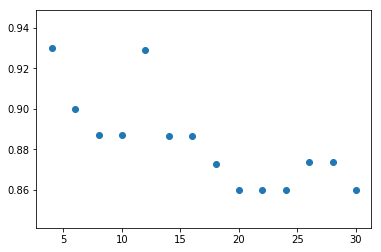

In [20]:
score=[]
for k in range(4,31,2):
    kNNuni = KNeighborsClassifier(k, weights='uniform')
    kNNuni.fit(X_train,y_train)
    y_pred = kNNuni.predict(X_test)
    score.append(precision_score(y_test, y_pred, average='weighted'))

k = range(4,31,2)
plt.scatter(k, score,)
plt.show()


# 5. Curse of dimensionality
<hr style="height:1px;border:none" />

Recall the breast cancer data covered during the [LDA](https://nbviewer.jupyter.org/github/sathayas/JupyterAnalyticsSpring2019/blob/master/LinDisc.ipynb) lecture. There are N=683 observations with 9 features (integer, 1-10). 

  * Say we take a look at one of the features (e.g., **`BareNuc`**). Since there are 10 levels for this feature, on average, we expect 68.3 observation in each level. 

  * Say we examine two features together (e.g., **`BareNuc`** and **`Chromatin`**). There are 10$\times$10 possible combinations of features. Thus, on average, we find 6.83 observation in each combination.

  * Say we examine three features together (e.g., **`BareNuc`**, **`Chromatin`**, and **`UniCellSize`**). There are 10$\times$10$\times$10 possible combinations of features. Thus, on average, we find 0.683 observation in each combination.

  * Fast forward, we examine all 9 features together. There are 10<sup>9</sup> possible combinations of features. Thus, on average, we find 0.000000683 observation in each combination.

As you can see, as the number of features increase, the data becomes more and more sparse. In other words, the data covers only a very small fraction of all possible inputs. Thus, a classifier built on a limited amount of data may attempt to classify an input it has never seen before. This shows how difficult it is to have a sufficient amount of data to cover all possible ranges in all features simultaneously. This is often referred as the **curse of dimensionality**. A large number of features does not necessarily mean a better prediction, since the data becomes sparser as the dimension increases. Thus it is important to select features or reduce dimensionality before building a classifier on a high-dimensional data set.